# Gradient Descent with SGD Regresser

## Gradient Descent

Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


Question: What loss functions do we know?

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

We will use the boston dataset for this task.  

In [16]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

data = load_boston()
X = pd.DataFrame(data['data'], columns=data.feature_names)
y = pd.DataFrame(data['target'])

In [17]:
X.shape

(506, 13)

In [20]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
from sklearn.linear_model import SGDRegressor

In [47]:
# Instantiate a SGDRegressor object and run partial fit on X and y. For now, pass the argument `penalty=None`

sgd = SGDRegressor(verbose=True, shuffle=False)

sgd.partial_fit(X, y)

-- Epoch 1
Norm: 4.51, NNZs: 10, Bias: 110.052407, T: 442, Avg. loss: 6421.159809
Total training time: 0.00 seconds.


SGDRegressor(shuffle=False, verbose=True)

In [48]:
# Inspect the coefficient array
sgd.coef_

array([ 0.44416674,  0.09272025,  2.41540179,  1.65523776,  0.46116567,
        0.30219402, -1.59760452,  1.50234556,  2.24206551,  1.18817065])

In [49]:
# Import mean_squared_error from metrics, and pass in the true ys, an array of predictions
# and the agrument squared = False
from sklearn.metrics import mean_squared_error

mean_squared_error(y, sgd.predict(X))

7661.399338690458

In [9]:
# Repeat the partial fit. Inspect, RMSE, coefficients.
sgd.partial_fit(X,y)

-- Epoch 1
Norm: 8.22, NNZs: 10, Bias: 135.099216, T: 442, Avg. loss: 3340.008227
Total training time: 0.00 seconds.


SGDRegressor(shuffle=False, verbose=True)

In [10]:
mean_squared_error(y, sgd.predict(X))

6148.167384685201

Pick a coefficient, and explain the gradient descent update.


In [11]:
sgd.coef_

array([ 0.99419097,  0.20791507,  4.24531123,  3.01976326,  1.08375452,
        0.80509955, -2.82192336,  2.81882116,  4.00139677,  2.36239052])

In [12]:
# code
coef_0 = []
loss = []

sgd = SGDRegressor(penalty=None)
for _ in range(1000):
    sgd.partial_fit(X,y)
    coef_0.append(sgd.coef_[0])
    loss.append(mean_squared_error(y, sgd.predict(X)))

In [13]:
sgd.coef_

array([  47.73425044,  -41.7751464 ,  279.84148936,  193.62221321,
         32.79885361,    4.2621628 , -156.83160495,  138.01463251,
        245.63374509,  133.67295598])

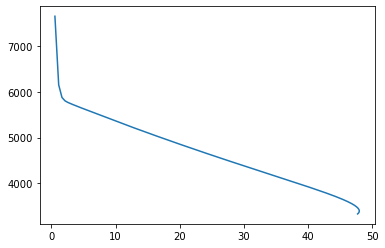

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(coef_0, loss)

In [15]:
# code
sgd.fit(X,y)

/Users/johnmaxbarry/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(penalty=None)

In [16]:
sgd.coef_

array([  47.96827157,  -41.98141051,  279.55838156,  193.37895453,
         32.81047805,    4.14153642, -156.90665958,  138.29408461,
        245.69014148,  133.82231668])

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [34]:
mean_squared_error(y, lr.predict(X))

2859.6903987680657

In [29]:
# code
coef_0 = []
loss = []

sgd = SGDRegressor(penalty=None)
for _ in range(10000):
    sgd.partial_fit(X,y)
    coef_0.append(sgd.coef_[0])
    loss.append(mean_squared_error(y, sgd.predict(X)))

In [31]:
sgd.coef_

array([ 2.46223394e-01, -2.16779253e+02,  5.06832760e+02,  3.11482222e+02,
       -4.98778687e+01, -1.14792937e+02, -2.08271838e+02,  1.24160285e+02,
        4.28093550e+02,  1.04708053e+02])

In [32]:
mean_squared_error(y, sgd.predict(X))

2887.678604670771

# Try the same with scaled data.

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [55]:
import pandas as pd
pd.DataFrame(X_sc).describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-3.215126e-17,-6.430251e-17,-4.420798e-17,8.037814e-18,2.411344e-17,-2.009453e-17,2.411344e-17,-2.411344e-17,0.000000,-3.215126e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.699016,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040947,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681870,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758,2.851075e+00


In [36]:
# code
coef_0 = []
loss = []

sgd_sc = SGDRegressor(penalty=None)
for _ in range(10000):
    sgd_sc.partial_fit(X_sc,y)
    coef_0.append(sgd_sc.coef_[0])
    loss.append(mean_squared_error(y, sgd_sc.predict(X_sc)))

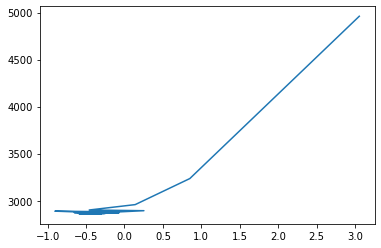

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(coef_0, loss)

In [38]:
sgd_sc.coef_

array([ -0.47657511, -11.40320942,  24.71988401,  15.41499735,
       -37.69763747,  22.66430961,   4.79129232,   8.39846079,
        35.7123744 ,   3.2122573 ])

With scaled data, the SGD regressor is able to achieve essentially the same results as linear regression.

In [40]:
mean_squared_error(y, sgd_sc.predict(X_sc))

2859.69513059776

# Standard Scale

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_sc, y)
lr.coef_

array([ -0.47623169, -11.40703082,  24.72625713,  15.42967916,
       -37.68035801,  22.67648701,   4.80620008,   8.422084  ,
        35.73471316,   3.21661161])

In [42]:
mean_squared_error(y, lr.predict(X_sc))

2859.6903987680657